<a href="https://colab.research.google.com/github/abhinav9800/abhinav99/blob/main/bank_churn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
# dataset - https://www.kaggle.com/datasets/rangalamahesh/bank-churn

In [163]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [164]:
!kaggle datasets download -d rangalamahesh/bank-churn

bank-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [165]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bank-churn.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [167]:
df = pd.read_csv("/content/train.csv")

In [168]:
Country = pd.get_dummies(df['Geography'], prefix='Geography', drop_first=True)
gender = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)
df = df.drop(['Geography', 'Gender'], axis=1)
df = pd.concat([df, Country, gender], axis=1)

In [169]:
X = df.iloc[:, list(range(3, 11)) + list(range(12, 15))]
y = df.iloc[:,11]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
import xgboost as xgb

In [172]:
df.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165034 non-null  int64  
 1   CustomerId         165034 non-null  int64  
 2   Surname            165034 non-null  object 
 3   CreditScore        165034 non-null  int64  
 4   Age                165034 non-null  float64
 5   Tenure             165034 non-null  int64  
 6   Balance            165034 non-null  float64
 7   NumOfProducts      165034 non-null  int64  
 8   HasCrCard          165034 non-null  float64
 9   IsActiveMember     165034 non-null  float64
 10  EstimatedSalary    165034 non-null  float64
 11  Exited             165034 non-null  int64  
 12  Geography_Germany  165034 non-null  uint8  
 13  Geography_Spain    165034 non-null  uint8  
 14  Gender_Male        165034 non-null  uint8  
dtypes: float64(5), int64(6), object(1), uint8(3)
memory

In [174]:
df.corrwith(df['Exited'])

<ipython-input-174-c3448cff86d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Exited'])


id                   0.002512
CustomerId          -0.009947
CreditScore         -0.027383
Age                  0.340768
Tenure              -0.019565
Balance              0.129743
NumOfProducts       -0.214554
HasCrCard           -0.022141
IsActiveMember      -0.210237
EstimatedSalary      0.018827
Exited               1.000000
Geography_Germany    0.211054
Geography_Spain     -0.051175
Gender_Male         -0.146442
dtype: float64

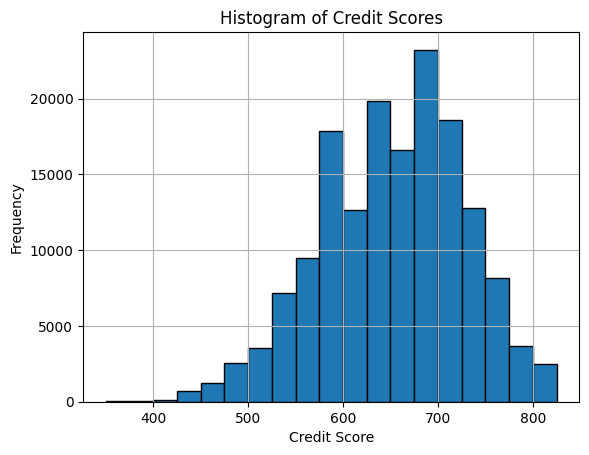

In [175]:
import matplotlib.pyplot as plt
bin_edges = range(350, 850, 25)

plt.hist(df['CreditScore'], bins=bin_edges, edgecolor='black')


plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Scores')


plt.grid(True)
plt.show()


<Axes: xlabel='Balance'>

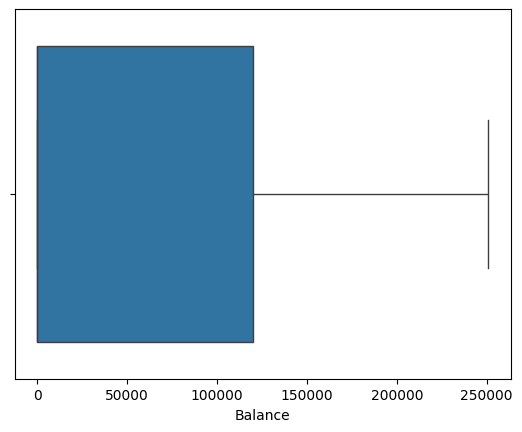

In [176]:
import seaborn as sns


sns.boxplot(x=df['Balance'])

<ipython-input-177-5f5a142a341e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=df, palette='viridis')


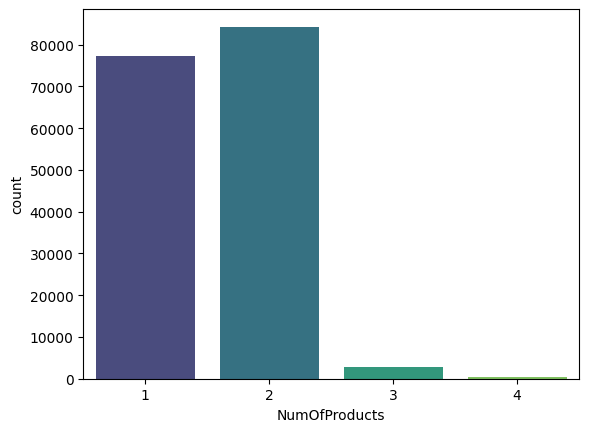

In [177]:
sns.countplot(x='NumOfProducts', data=df, palette='viridis')
plt.show()

In [178]:
from sklearn.linear_model import LogisticRegression
# penalty = 'l2'
log_reg = LogisticRegression(penalty= "l1" ,max_iter=160,solver='liblinear')


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8355197382373436


In [179]:
from sklearn.ensemble import RandomForestClassifier
f = RandomForestClassifier(n_estimators=200, max_depth=15,min_samples_leaf=180,min_samples_split=300, random_state=42,max_features=0.6)

f.fit(X_train, y_train)
y_pred =f.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

accuracy: 0.8660890114218196


In [180]:
import xgboost as xgb
model= xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=250,
 max_depth=5,
 min_child_weight=20,
 gamma=0.01,
 subsample=0.75,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_alpha=1e-5,
 seed=27)

model.fit(X_train, y_train)

y_pred =model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("accuracy:",accuracy)


accuracy: 0.8689974853818887


In [181]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth= 12,min_samples_split=400,min_samples_leaf=300)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8649983336867937
